In [1]:
# import requests
# import pandas as pd
# import matplotlib.pyplot as plt
# from env import key, client
# import datetime
# from datetime import date
# from datetime import datetime, timedelta
# from dateutil.relativedelta import *

# import re

# import json

# import climacell_api 
# import wrangle

In [2]:
# # This request is the San Antonio Botanical Garden. It returns realtime data for the identified fields.
# response = client.realtime(lat= 29.4576, lon=98.4587, 
#                            fields=['precipitation', 'temp', 'humidity', 'wind_speed', 'cloud_cover'])
# # Returns status code (Query Successful or Not)
# print(response.status_code)
# # Create df of results to visualize
# data = response.json()
# df = pd.DataFrame(data)
# df.head()

In [3]:
# #from climacell_api import ClimacellApiClient
# r = client.historical_station(lat=40, lon=50, start_time='2021-01-22T20:47:00Z', end_time='now', fields=['temp', 'wind_gust'])
# r.status_code

## Historical Climacell
`Data returned is a list of forecast data for a specific location up to 6 hours in the past.`

In [4]:
# stop = datetime.now().isoformat()
# start = (datetime.now() - timedelta(hours=6)).isoformat()

# url = "https://api.climacell.co/v3/weather/historical/climacell"

# querystring = {'lat': 40, 
#                'lon': 50,
#                "timestep":30,
#                "unit_system":"si",
#                "apikey":key, 
#                "start_time": start, 
#                "end_time": stop }

# response = requests.request("GET", url, params=querystring)
# data = response.json()
# df_clima = pd.DataFrame(data)
# df_clima.head(5)

## Historical Station
`24 hours in the past'

In [5]:
# import pandas as pd
# import numpy as np
# import requests
# import os
# from env import key, client
# import scipy as sp 
# import datetime
# from datetime import date
# from datetime import datetime, timedelta
# from dateutil.relativedelta import *

In [6]:
# def api_get():
#     stop = datetime.now().isoformat()
#     start = (datetime.now() - relativedelta(days=1)).isoformat()

#     url = "https://api.climacell.co/v3/weather/historical/station"

#     querystring = {'lat': 30, 
#                'lon': 40,
#                "unit_system":"si",
#                "apikey": key,
#                "start_time": start, 
#                "end_time": stop,
#                "fields":['temp','wind_speed','precipitation','baro_pressure'],
#               }

#     response = requests.request("GET", url, params=querystring)
#     data = response.json()
#     df = pd.DataFrame(data)
#     return df

# def data_clean(df):
#     #Modify Temp
#     df['temp'] = df['temp'].astype(str)
#     df['temp_degree_c']=df['temp'].str.extract(r'(\d+)')
#     df.drop(columns =['temp'], inplace = True)
#     #Modify Baro-Pressure
#     df['baro_pressure'] = df['baro_pressure'].astype(str)
#     df['baro_pressure_hPa']=df['baro_pressure'].str.extract(r'(\d+)')
#     df.drop(columns =['baro_pressure'], inplace = True)
#     #Modify Wind_speed
#     df['wind_speed'] = df['wind_speed'].astype(str)
#     df['wind_speed_m/s']=df['wind_speed'].str.extract(r'(\d+)')
#     df.drop(columns =['wind_speed'], inplace = True)
#     #Modify preciatation
#     df['precipitation'] = df['precipitation'].astype(str)
#     df['precipitation_mm/hr']=df['precipitation'].str.extract(r'(\d+)')
#     df.drop(columns =['precipitation'], inplace = True)
#     #Modify observation_time
#     df['observation_time']= df['observation_time'].astype(str)
#     df['observation_time']= df['observation_time'].str.extract(r'(\d+.\d+.\d+\d+.\d+.\d+)')
#     df['observation_time']= df['observation_time'].str.replace('T',' ')
#     df['precipitation_mm/hr'] = df['precipitation_mm/hr'].fillna(0)
#     return df

# def get_climacell_data():
#     df = api_get()
#     df = data_clean(df)
#     df_old = pd.read_csv('climate_data.csv', index_col=0)
#     merge = [df_old, df]
#     df = pd.concat(merge)
#     df.to_csv('climate_data.csv')
#     return df


#### Test for Thursday

In [7]:
# import wrangle
# df = wrangle.get_climacell_data()
# df.head()

In [8]:
# df.shape

In [9]:
# df.tail()

In [10]:
# df.tail(25)

In [11]:
# stop = datetime.now().isoformat()
# start = (datetime.now() - relativedelta(days=1)).isoformat()

# url = "https://api.climacell.co/v3/weather/historical/station"

# querystring = {'lat': 30, 
#                'lon': 40,
#                "unit_system":"si",
#                "apikey":key,
#                "start_time": start, 
#                "end_time": stop,
#                "fields":['temp','wind_speed','precipitation','baro_pressure'],
#               }


# response = requests.request("GET", url, params=querystring)
# data = response.json()
# df_hist = pd.DataFrame(data)
# df_hist.head(5)
# # #df_hist.to_csv('climate_data.csv')

### Unpack Column and turn it in to individual colums in data frame

In [12]:
# df_hist.info()

In [13]:
# df_hist['temp'] = df_hist['temp'].astype(str)

In [14]:
# df_hist.info()

In [15]:
# #Modify Temp
# df_hist['temp'] = df_hist['temp'].astype(str)
# df_hist['temp_degree_c']=df_hist['temp'].str.extract(r'(\d+)')
# df_hist.drop(columns =['temp'], inplace = True)
# #Modify Baro-Pressure
# df_hist['baro_pressure'] = df_hist['baro_pressure'].astype(str)
# df_hist['baro_pressure_hPa']=df_hist['baro_pressure'].str.extract(r'(\d+)')
# df_hist.drop(columns =['baro_pressure'], inplace = True)
# #Modify Wind_speed
# df_hist['wind_speed'] = df_hist['wind_speed'].astype(str)
# df_hist['wind_speed_m/s']=df_hist['wind_speed'].str.extract(r'(\d+)')
# df_hist.drop(columns =['wind_speed'], inplace = True)
# #Modify preciatation
# df_hist['precipitation'] = df_hist['precipitation'].astype(str)
# df_hist['precipitation_mm/hr']=df_hist['precipitation'].str.extract(r'(\d+)')
# df_hist.drop(columns =['precipitation'], inplace = True)
# #Modify observation_time
# df_hist['observation_time']= df_hist['observation_time'].astype(str)
# df_hist['observation_time']= df_hist['observation_time'].str.extract(r'(\d+.\d+.\d+\d+.\d+.\d+)')
# df_hist['observation_time']= df_hist['observation_time'].str.replace('T',' ')
# df_hist['precipitation_mm/hr'] = df_hist['precipitation_mm/hr'].fillna(0)
# df_hist.head()

In [16]:
# df_hist.info()

#### Dictionary to Unpack

In [17]:
# temp.drop(columns=['units'], inplace = True)
# temp_df = pd.DataFrame(temp)
# temp_df
# tf = pd.DataFrame([
#         {'id': 1, 'nested': {'a': 1, 'b': 2} },
#         {'id': 2, 'nested': {'a': 2, 'b': 4} },
#         {'id': 3, 'nested': {'a': 3, 'b': 6} },
#         {'id': 4, 'nested': {'a': 4}},
#     ])
# tf.head()

#### Function to Unpack and Create Columns

In [18]:
# def unpack(df, column, fillna=None):
#     ret = None
#     if fillna is None:
#         ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems()))], axis=1)
#         del ret[column]
#     else:
#         ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems())).fillna(fillna)], axis=1)
#         del ret[column]
#     return ret

# unpack(tf, 'nested', 0)

In [19]:
# df = pd.concat([df, pd.DataFrame(list(df['run_info'])).fillna(0).astype(int)], axis=1)

### Append to DF

In [20]:
# result = pd.concat([df_hist, temp], axis=1)
# result

In [21]:
# now = datetime.now()
# year = '{:02d}'.format(now.year)
# month = '{:02d}'.format(now.month)
# day = '{:02d}'.format(now.day)
# hour = '{:02d}'.format(now.hour)
# minute = '{:02d}'.format(now.minute)
# day_month_year_hour_now = '{}-{}-{}-{}'.format(year, month, day, hour)
# day_month_year_hour_now

In [22]:
# six_hour_ago = datetime.now() - timedelta(hours=6)
# year = '{:02d}'.format(six_hour_ago.year)
# month = '{:02d}'.format(six_hour_ago.month)
# day = '{:02d}'.format(six_hour_ago.day)
# hour = '{:02d}'.format(six_hour_ago.hour)
# minute = '{:02d}'.format(six_hour_ago.minute)
# day_month_year_hour_past = '{}-{}-{}-{}'.format(year, month, day, hour)
# day_month_year_hour_past

In [23]:
# start = datetime.now().isoformat()
# start

In [24]:
# stop = (datetime.now() - relativedelta(months=4)).isoformat()
# stop

#### Panel Library 

In [25]:
import panel as pn
def f(x): return x * x
pn.extension()
pn.interact(f, x=10)

Column
    [0] Column
        [0] IntSlider(end=30, name='x', start=-10, value=10, value_throttled=10)
    [1] Row
        [0] Str(int, name='interactive00007')

In [26]:
temp = pn.widgets.IntRangeSlider(name= 'Temp Range Slider', 
                                 width= 250, start=7, end=26, 
                                 value=(7, 26), 
                                 value_throttled=(7, 26))
temp

IntRangeSlider(end=26, name='Temp Range Slider', start=7, value=(7, 26), value_throttled=(7, 26), width=250)

# Panel Project

In [32]:
import pandas as pd 
import param
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
import hvplot as hv
import warnings
warnings.filterwarnings("ignore")

# create a data set of animal ratings
df = pd.DataFrame({'Animal':['Pig', 'Goat' ,'Sheep', 'Frog', 'Goat', 'Goat', 'Pig', 'Sheep', 'Octopus'], 
                   'Rating':[3, 10, 3, 2, 9, 10, 4, 1, 1]})

df.head()

,Animal,Rating
0,Pig,3
1,Goat,10
2,Sheep,3
3,Frog,2
4,Goat,9


# Define the holoviz panel parameter selector and plots in a class

In [28]:
class RatingsDashboard(param.Parameterized):

    # widget containing the list of animals
    Animal = param.ObjectSelector(default='Goat', objects=list(df.Animal.unique()))

    def get_data(self):
        class_df = df[(df.Animal==self.Animal)].copy()
        return class_df

    # seaborn box plot for chose animal
    def box_view(self):
        data = self.get_data()
        ax = sns.boxplot(data['Rating'])
        plt.close()
        return ax.figure

    def table_view(self):
        data = self.get_data()
        return data

# Create an instance of the class


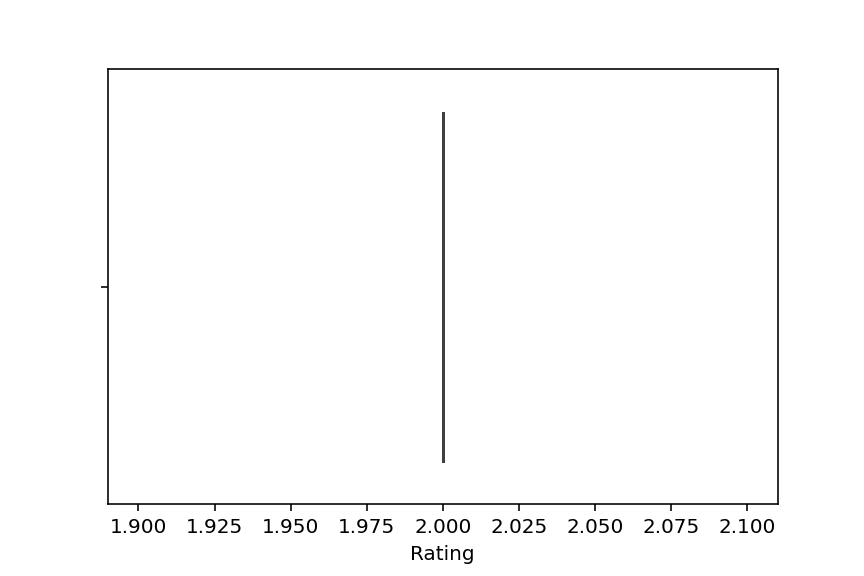
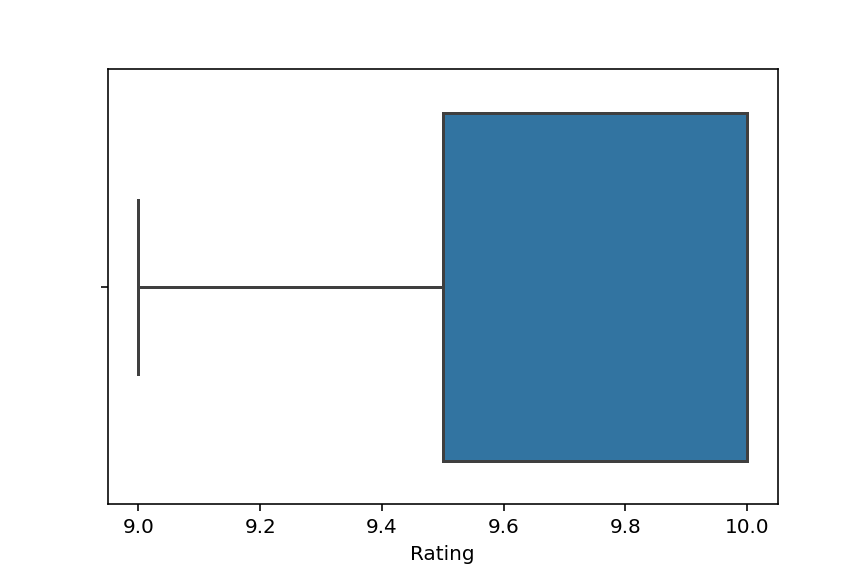
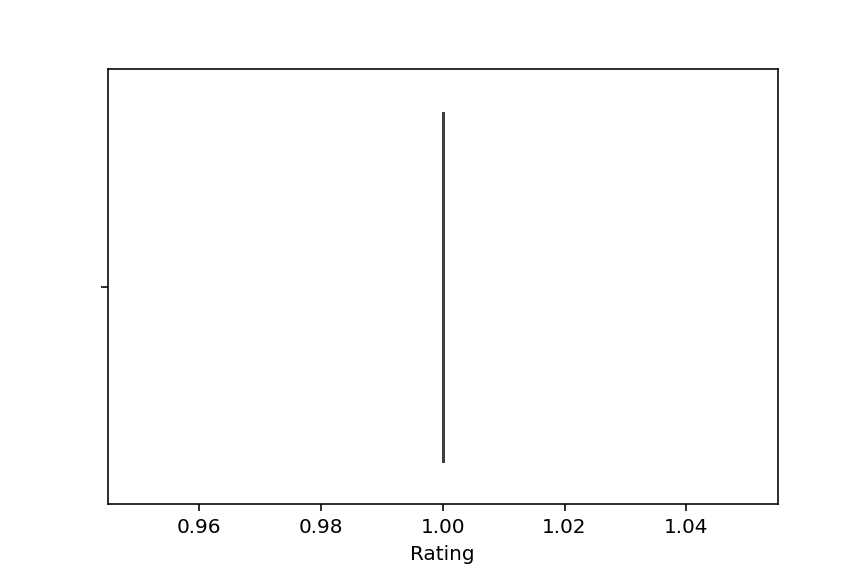
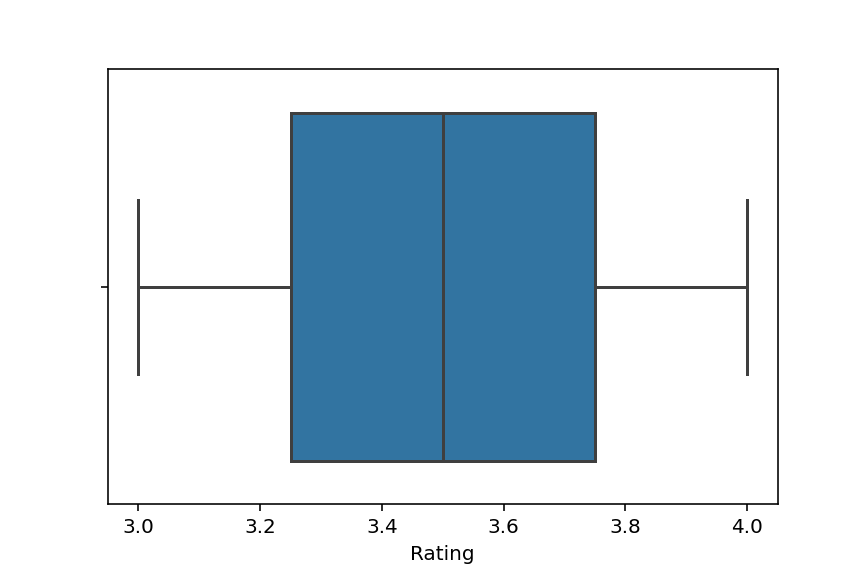
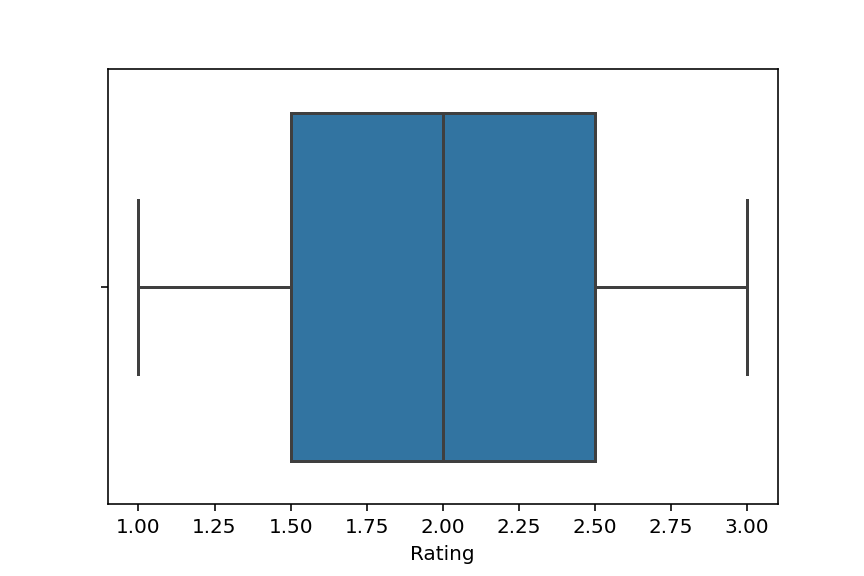
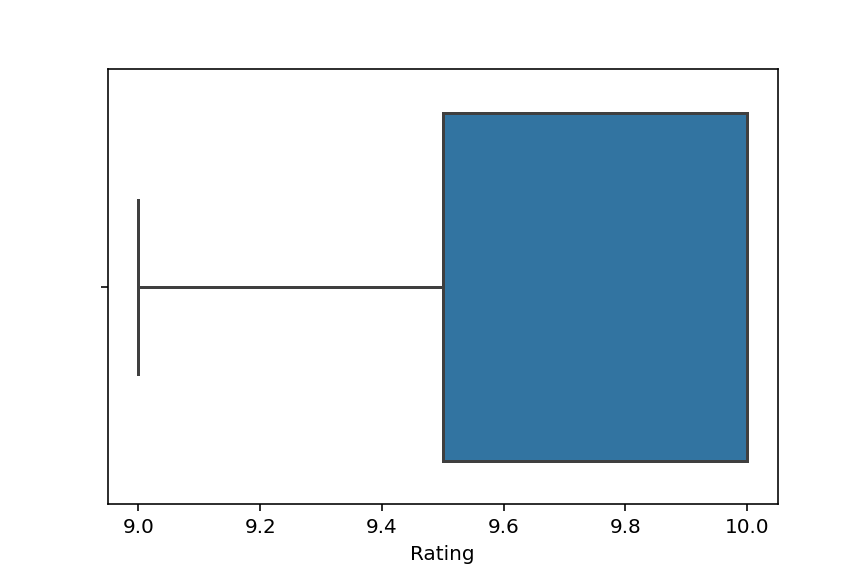

In [34]:
rd = RatingsDashboard(name='')

# Create title for the dashboard
dashboard_title = '# Animal Ratings Dashboard'

# Create some text describing the dashboard
dashboard_desc = 'An example of a simple interactive HoloViz Panel dashbard using a dummy data set of animal ratings.'

# Create a dashboard, defining the layout as one column containing
# the dashboard title, dashboard description, 'Animal' drop down selector,
# box plot, and data table
dashboard = pn.Column(dashboard_title,
                      dashboard_desc,
                      rd.param, # animal drop down selector
                      rd.box_view, # Box Plot
                      rd.table_view # Data Table
                     )

dashboard.embed(max_opts = 5) # provides access to all 5 animals